In [1]:
import os

if(os.getcwd().split('\\')[-1] == 'analytic'):           
    os.chdir('../')
os.getcwd()

'S:\\MSE\\project\\rnd-agent'

In [2]:
from typing import List
from tensorflow.python.summary.summary_iterator import summary_iterator
import matplotlib.pyplot as plt
import pandas as pd
from collections import defaultdict
from utlis.io_helper import OsPath
from tensorflow.python.framework import tensor_util
import os
import yaml
import numpy as np
import tensorflow as tf

import seaborn as sns; sns.set()

from tensorflow.core.util import event_pb2
from tensorflow.python.lib.io import tf_record
from matplotlib.image import imread

from analytic.tensorboard_helpers import *
from analytic.analytic_helpers import *

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

## Constants

In [3]:
run = '2020-08-15-23-42'
log_name = run + '--rnd-grayscale-eval'

event_file_0 = OsPath(f"eval/{run}/env_eval_instance_0/")
event_file_1 = OsPath(f"eval/{run}/env_eval_instance_1/")
event_file_2 = OsPath(f"eval/{run}/env_eval_instance_2/")
event_file_3 = OsPath(f"eval/{run}/env_eval_instance_3/")

log_folder = OsPath(f"data/{log_name}/")

log_path_0 = log_folder + "eval_0.yaml"
log_path_1 = log_folder + "eval_1.yaml"
log_path_2 = log_folder + "eval_2.yaml"
log_path_3 = log_folder + "eval_3.yaml"

event_files = [event_file_0, event_file_1, event_file_2,event_file_3]
log_paths = [log_path_0, log_path_1, log_path_2, log_path_3]

data_folder = OsPath("data/test_simple/")

img_left_bottom = np.array([-7.5, -9.9])
img_right_top = np.array([37.2, 8.1])
level_img_path_0 = 'data/TestLevel0.png'
level_img_path_1 = 'data/TestLevel1.png'
level_img_path_2 = 'data/TestLevel2.png'
level_img_path_3 = 'data/TestLevel3.png'
level_img_left = -7.5
level_img_right = 37.2
level_img_bottom = -9.9
level_img_top = 8.1
img0 = imread(level_img_path_0)
img1 = imread(level_img_path_1)
img2 = imread(level_img_path_2)
img3 = imread(level_img_path_3)
imgs = [img0, img1, img2, img3]

skip_steps = 20

## Save to file

In [4]:
for log_path, event_file in zip(log_paths, event_files):
    # if not log_path.exists():
        save(log_path, event_file)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


## load Data

In [5]:
dicts = [load(log_path) for log_path in log_paths]
dfs = [pd.DataFrame(data=d).iloc[skip_steps:] for d in dicts]

df = pd.DataFrame()
for d in dfs:
    df = pd.concat([df, d])

In [6]:
df

curiosity   ix   iy         x         y
20    1.486943  3.0  1.0  1.499997 -0.575000
21    1.049342  4.0  1.0  1.799997 -0.575000
22    0.658651  5.0  1.0  2.099997 -0.220544
23    0.689276  5.0  3.0  2.379997  0.260201
24    0.896820  6.0  4.0  2.699996  0.705916
..         ...  ...  ...       ...       ...
995   1.773625 -3.0  3.0 -1.200002  0.469181
996   1.351008 -3.0  4.0 -0.900002  0.844122
997   1.854178 -2.0  5.0 -0.600002  1.120960
998   1.014275 -1.0  5.0 -0.319987  1.290407
999   1.128488  0.0  5.0 -0.000002  1.380341

[3920 rows x 5 columns]

# Test Level

## Filter out bad runs

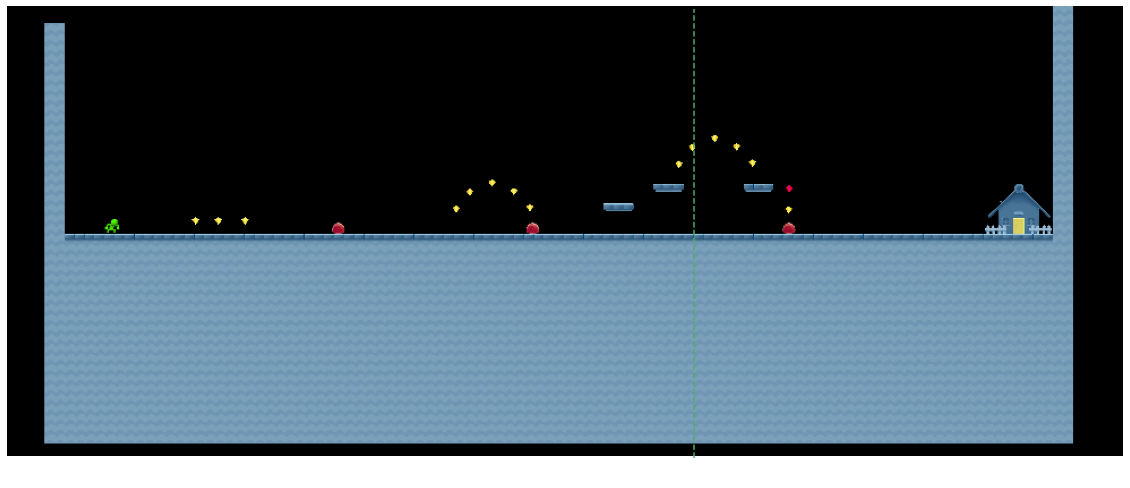

In [7]:
plt.figure(figsize=(20,10))
# plt.scatter([20.0], [0.0])
# plt.title("Minimum erreichte x Koorinaten")
plt.vlines(x=[20.0], ymin=-10, ymax=8, colors='g', linestyles='dashed', label='minimum x wert')
plot_level(img0)
plt.grid(b=None)
plt.axis('off')
plt.savefig(str(log_folder + 'min_x_pos.png'), dpi=300, bbox_inches='tight')
plt.show()

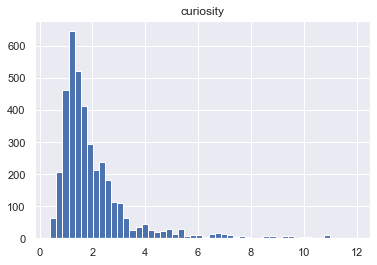

mean 2.0239885706910674
median 1.592799425125122
std 1.4617435212725693


In [8]:
df.hist('curiosity', bins=50)
# plt.title("Histogram of the curiosity")
plt.savefig(str(log_folder + 'hist.png'), bbox_inches='tight')
plt.show()
print('mean', df.curiosity.mean())
print('median', df.curiosity.median())
print('std', df.curiosity.std())

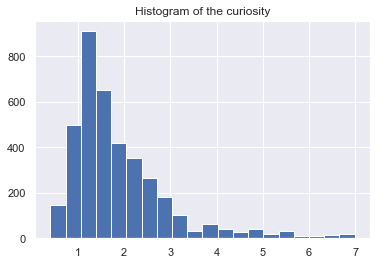

In [9]:
df[df.curiosity < 7].hist('curiosity', bins=20)
plt.title("Histogram of the curiosity")
plt.savefig(str(log_folder + 'hist.png'), bbox_inches='tight')
plt.show()

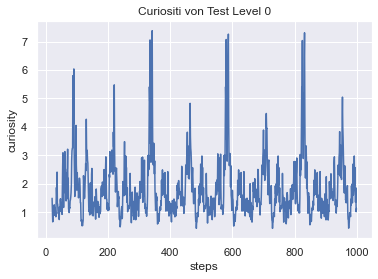

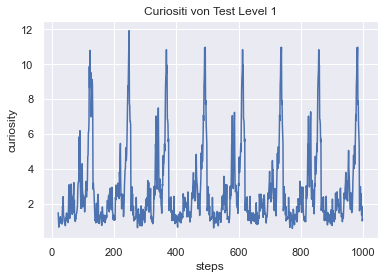

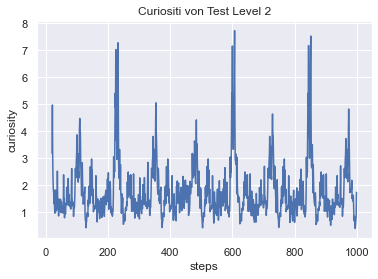

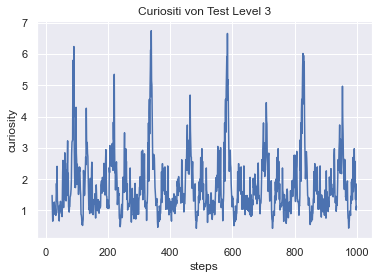

In [10]:
for i, df_instance in enumerate(dfs):
    df_instance.plot(y='curiosity', use_index=True, legend=False)
    plt.xlabel('steps')
    plt.ylabel('curiosity')
    plt.title(f"Curiositi von Test Level {i}")
    plt.savefig(str(log_folder + f"curiosity_over_steps_{i}.png"), bbox_inches='tight')
    plt.show()

## Position Plot

<Figure size 1440x720 with 0 Axes>

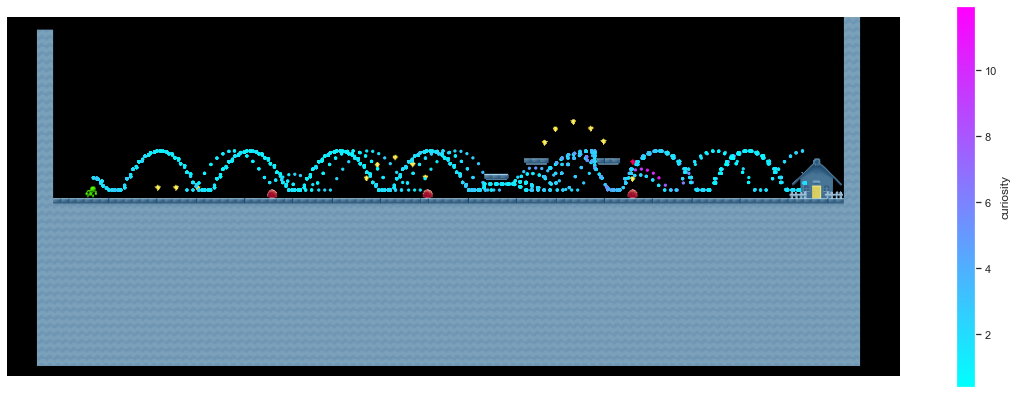

In [11]:
plt.figure(figsize=(20,10))
df.plot.scatter('x', 'y', c='curiosity', s=5, colormap='cool', figsize=(20,7))
plot_level(img0)
plt.grid(b=None)
plt.axis('off')
plt.savefig(str(log_folder + 'position_plot.png'), dpi=300, bbox_inches='tight')
plt.show()

In [12]:
def slider_action(start):
    plot_position_slice(start, start+4000, img3, df)

interact(slider_action, start=widgets.IntSlider(min=0, max=len(df), step=4000, value=0))

interactive(children=(IntSlider(value=0, description='start', max=3920, step=4000), Output()), _dom_classes=('…

<function __main__.slider_action(start)>

## Only hight curiosity

count: 185


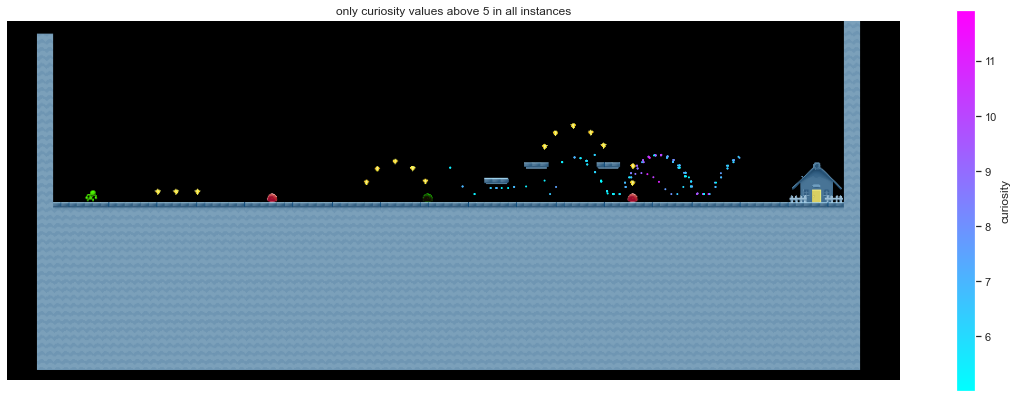

     curiosity    ix   iy          x         y
248  11.922219  69.0  1.0  27.613647 -0.575000
247  10.984663  68.0  1.0  27.333656 -0.575000
983  10.975787  62.0  2.0  25.131912  0.035788
738  10.975787  63.0  5.0  25.242874  1.382800
493  10.975787  63.0  5.0  25.242874  1.382800
491  10.938445  61.0  5.0  24.662888  1.239976
736  10.938445  61.0  5.0  24.662888  1.239976
981  10.938445  61.0  3.0  24.551918  0.420856
858  10.836678  61.0  5.0  24.613785  1.290406
368  10.836678  66.0  2.0  26.742805  0.052892


In [13]:
threshold = 5

def create_hight_curiosity_plot(data_frame: pd.DataFrame, name: str, ax: plt.Axes = None, figsize=(20,7), size=1) -> plt.Axes:
    return data_frame.plot.scatter('x', 'y', c='curiosity', colormap='cool', s=size, figsize=figsize, 
                                   title=f"only curiosity values above {threshold} in {name}", ax=ax)

df_hight_curiosity = df[df.curiosity > threshold]
print('count:', len(df_hight_curiosity))
create_hight_curiosity_plot(df_hight_curiosity, 'all instances')
plot_level(img1)
disable_grid_and_axis()
plt.savefig(str(log_folder + 'best_curiosity_plot.png'), dpi=300, bbox_inches='tight')
plt.show()
df_sorted = df_hight_curiosity.sort_values(by=['curiosity'], ascending=False)
print(df_sorted.iloc[:10])

## For each Instance

19


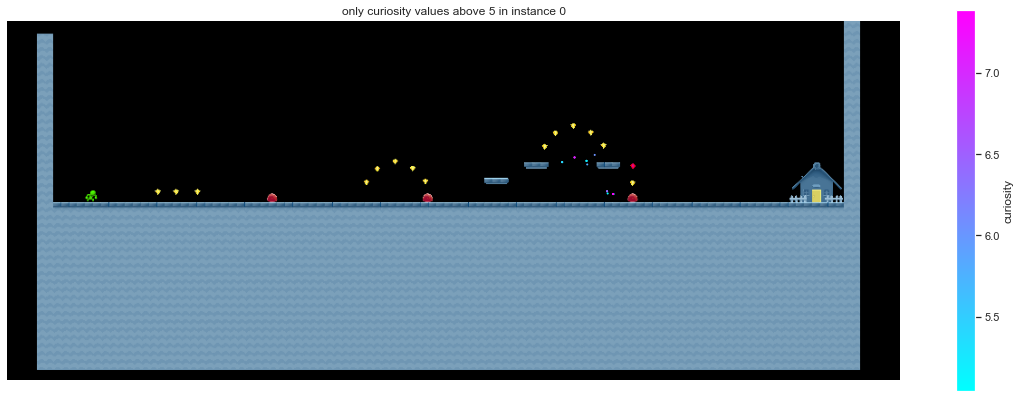

131


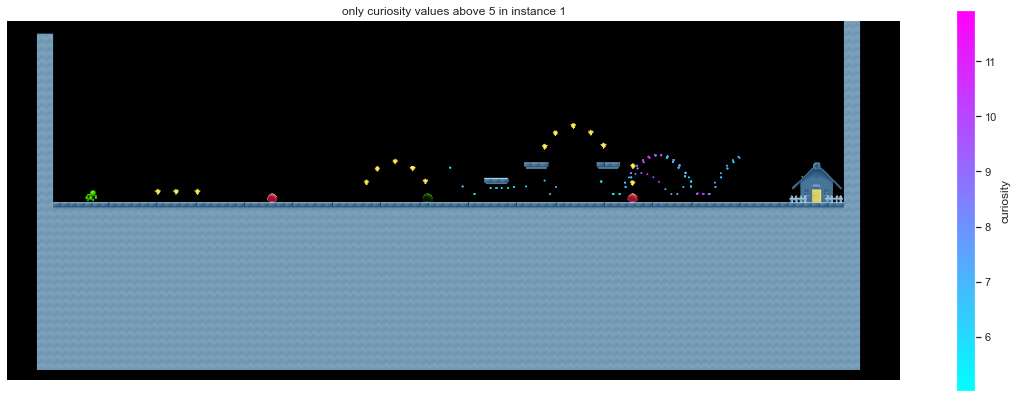

17


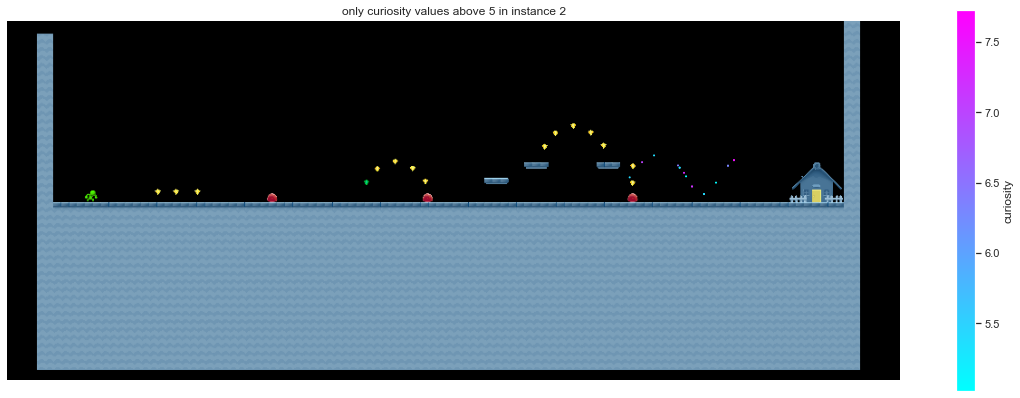

18


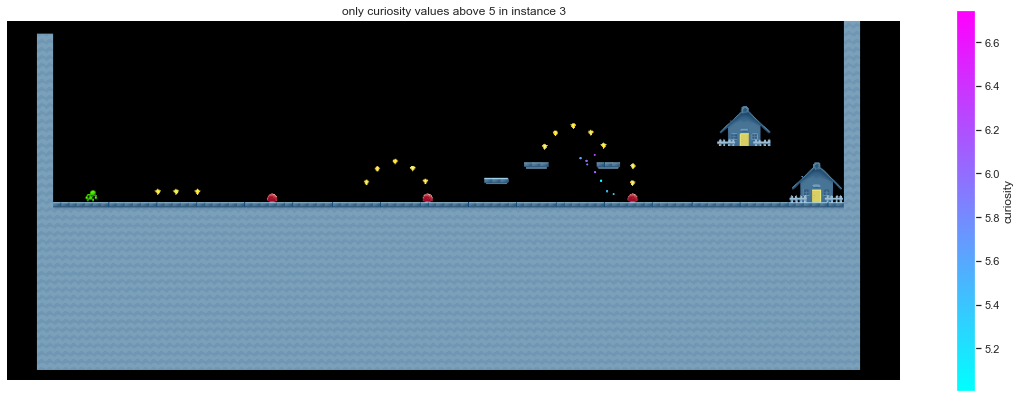

In [14]:
for i, df_instance in enumerate(dfs):
    df_hight_curiosity = df_instance[df_instance.curiosity > threshold]
    print(len(df_hight_curiosity))

    create_hight_curiosity_plot(df_hight_curiosity, f"instance {i}")
    plot_level(imgs[i])
    disable_grid_and_axis()
    plt.show()
    df_sorted = df_hight_curiosity.sort_values(by=['curiosity'], ascending=False)

In [15]:
df_bugs = pd.read_json(str(data_folder + 'bug_locations.json'))

df_bugs_0 = df_bugs[df_bugs.InstanceId == 0]
df_bugs_1 = df_bugs[df_bugs.InstanceId == 1]
df_bugs_2 = df_bugs[df_bugs.InstanceId == 2]
df_bugs_3 = df_bugs[df_bugs.InstanceId == 3]

df_bugs_i = [df_bugs_0, df_bugs_1, df_bugs_2, df_bugs_3]

df_bugs

X         Y  Radius                   Name  InstanceId  Visible
0  23.840000  0.790000     0.5        TokenWrongColor           0     True
1   2.040001 -0.490000     0.5            NoAnimation           2     True
2  10.500000 -0.015465     0.5        TokenWrongColor           2     True
3   0.970001 -0.490000     0.5      TokenKillInstance           1    False
4  13.561996 -0.415465     0.5        WrongColorEnemy           1     True
5  29.490000  2.540001     2.0          HouseInTheAir           3     True
6  10.500000 -0.015465     0.5        TokenNoCollider           3    False
7  13.562000 -0.415465     0.5  EnemyReverseBehaviour           0    False

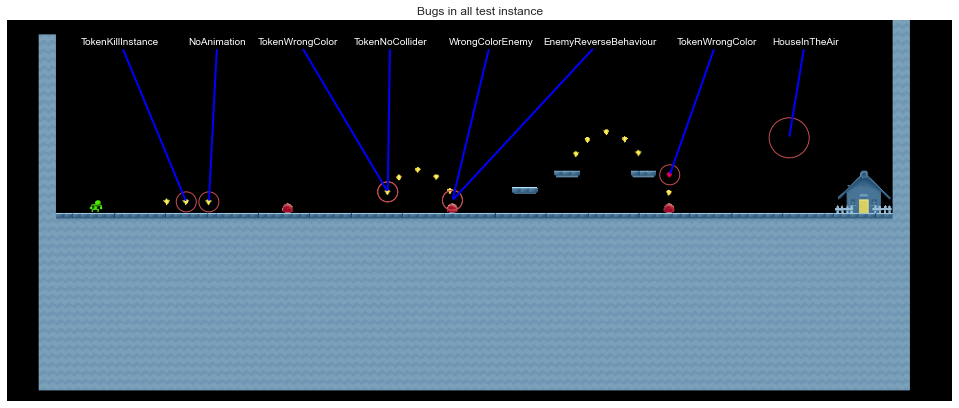

In [16]:
def annotate_bugs_plot(ax, names, xs, ys, char_size=0.3):
    x_text = xs[0] - 5
    for txt, x, y in zip(names, xs, ys):
    # for i, txt in enumerate(names):
        ax.annotate(txt, (x, y), xytext=[x_text, 7], color='white', arrowprops={'arrowstyle': '-', 'color': 'blue', 'lw': 2})
        x_text += len(txt)*char_size

def create_bugs_in_level_plot(data_frame: pd.DataFrame, name:str, ax: plt.Axes = None, char_size=0.3, figsize=(20,7)) -> plt.Axes:
    ax = data_frame.plot.scatter('X', 'Y', s=data_frame.Radius*800, figsize=figsize, title=f"Bugs in {name}", color='none', edgecolors='r', ax=ax)
    df_bugs_plot = data_frame.sort_values('X').reset_index()
    annotate_bugs_plot(ax, df_bugs_plot.Name, df_bugs_plot.X, df_bugs_plot.Y, char_size)
    # x_text = df_bugs_plot.X[0] - 5
    # for i, txt in enumerate(df_bugs_plot.Name):
    #     ax.annotate(txt, (df_bugs_plot.X[i], df_bugs_plot.Y[i]), xytext=[x_text, 7], color='white', arrowprops={'arrowstyle': '-', 'color': 'blue', 'lw': 2})
    #     x_text += len(txt)*0.3

    return ax

create_bugs_in_level_plot(df_bugs, 'all test instance')
plot_level(img0)
disable_grid_and_axis()
plt.savefig(str(log_folder + 'bugs_in_the_level.png'), dpi=300, bbox_inches='tight')
plt.show()

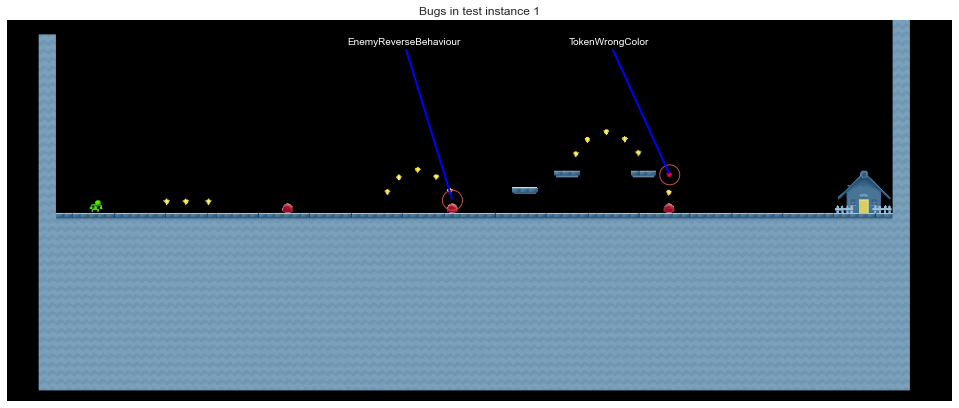

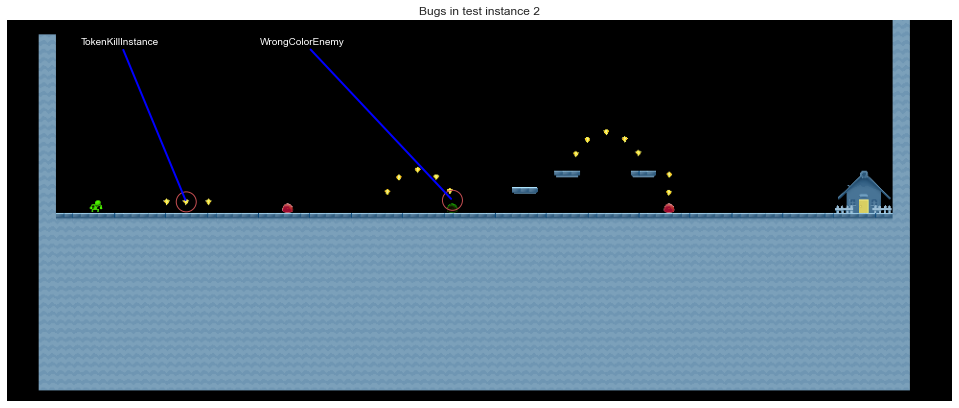

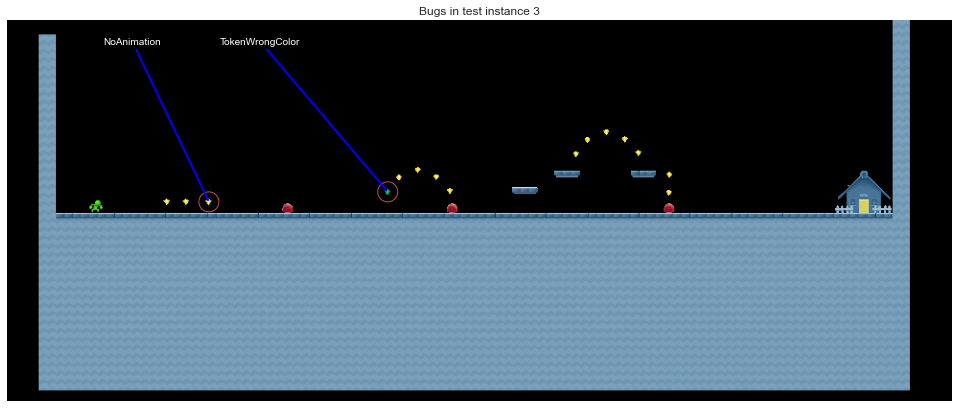

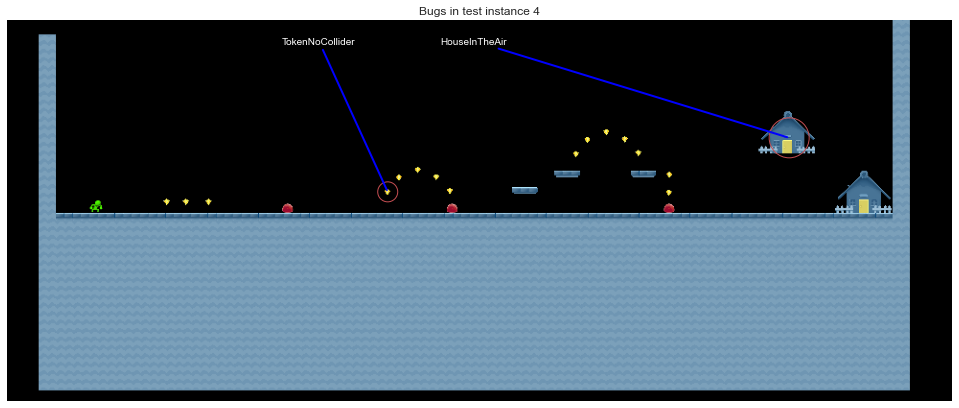

In [17]:
for i, df_bugs_instance in enumerate(df_bugs_i):
    create_bugs_in_level_plot(df_bugs_instance, f"test instance {i+1}", char_size=0.5)
    plot_level(imgs[i])
    disable_grid_and_axis()
    plt.savefig(str(log_folder + f"bugs_in_the_level_{i}.png"), dpi=300, bbox_inches='tight')
    plt.show()

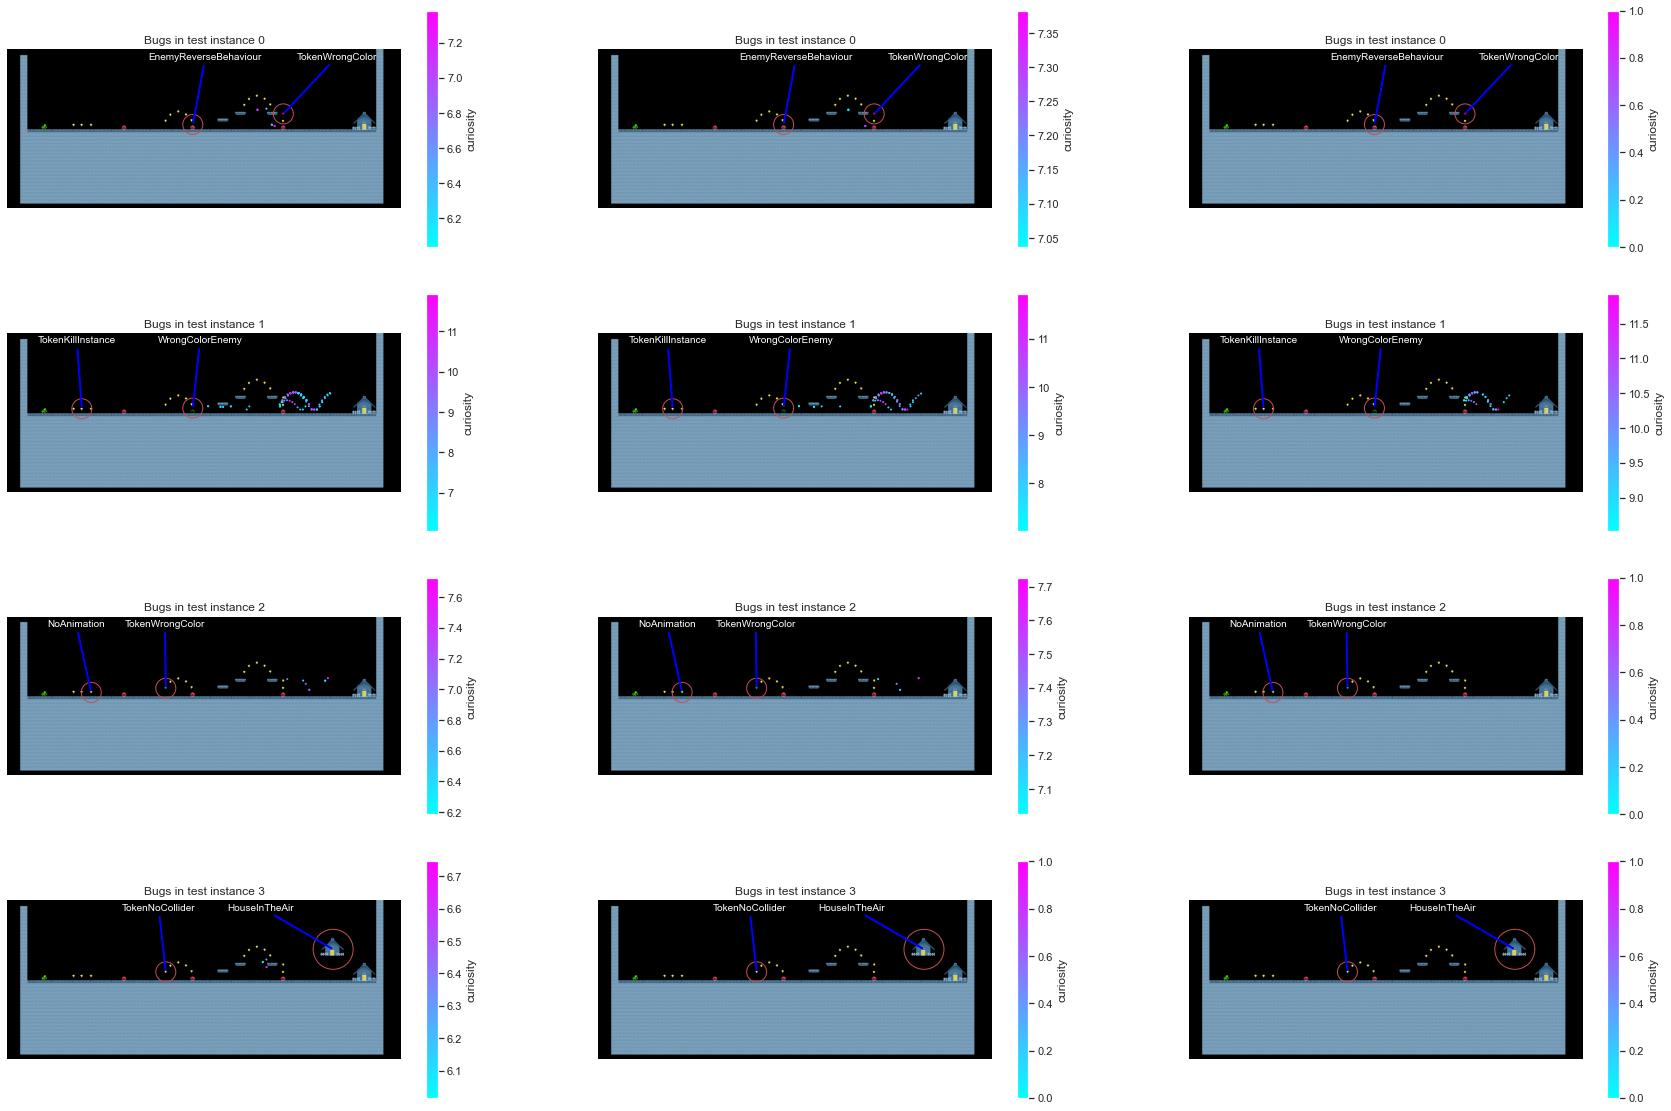

[6, 7, 8]


In [18]:
def plot_bugs_and_hight_curiosity(axs, threshold: float):
    for i, (df_instance, df_bugs_instance) in enumerate(zip(dfs, df_bugs_i)):
        df_hight_curiosity = df_instance[df_instance.curiosity > threshold]
        create_hight_curiosity_plot(df_hight_curiosity, f"instance {i}", axs[i], figsize=None)
        create_bugs_in_level_plot(df_bugs_instance, f"test instance {i}", axs[i], char_size=0.8, figsize=None)
        plot_level(imgs[i], axs[i])
        disable_grid_and_axis(axs[i])
        # plt.savefig(str(log_folder + f"best_curiosity_plot_{i}.png"), dpi=300, bbox_inches='tight')
        # plt.show()
        df_sorted = df_hight_curiosity.sort_values(by=['curiosity'], ascending=False)
        # print(df_sorted)

thresholds = [6, 7, 8]

fig, axs = plt.subplots(nrows=4, ncols=len(thresholds), figsize=(30,20), clear=True)
for i, t in enumerate(thresholds):
    plot_bugs_and_hight_curiosity(axs[:, i], t)

plt.savefig(str(log_folder + f"best_curiosity_plot_{thresholds}.png"), dpi=300, bbox_inches='tight')
plt.show()

print(thresholds)

## Bugs found

In [19]:
def eval_bugs(threshold: float):
    true_positives = [[], [], [], []]
    false_positives = [[], [], [], []]
    bug_names = set()

    tp = 0
    fp = 0
    tn = 0
    fn = 0

    camera_radius = 4

    for instance_id, df_instance in enumerate(dfs):
        df_instance_positiv = df_instance[df_instance.curiosity > threshold]
        df_instance_negative = df_instance[df_instance.curiosity <= threshold]
        for i, r_test in df_instance_positiv.iterrows():
            test_pos = np.array([r_test.x, r_test.y])
            is_real_bug = False
            for j, r_bugs in df_bugs_i[instance_id].iterrows():
                bug_pos = np.array([r_bugs.X, r_bugs.Y])
                dist = np.linalg.norm(bug_pos - test_pos)

                c_radius = camera_radius if r_bugs['Visible'] else 0
                if dist < r_bugs.Radius + c_radius:
                    if r_bugs.Name not in bug_names:
                        bug_names.add(r_bugs.Name)

                    bugs_dict = {'x': r_test.x, 'y': r_test.y, 'name': r_bugs.Name, 'curiosity': r_test.curiosity, 'instance_id': instance_id}
                    true_positives[instance_id].append(bugs_dict)
                    tp += 1
                    is_real_bug = True
            if not is_real_bug:
                fp += 1
                false_positives[instance_id].append(test_pos)

        for i, r_test in df_instance_negative.iterrows():
            test_pos = np.array([r_test.x, r_test.y])
            is_real_bug = False
            for j, r_bugs in df_bugs_i[instance_id].iterrows():
                bug_pos = np.array([r_bugs.X, r_bugs.Y])
                dist = np.linalg.norm(bug_pos - test_pos)

                c_radius = camera_radius if r_bugs['Visible'] else 0
                if dist < r_bugs.Radius + c_radius:
                    fn += 1
                    is_real_bug = True
            if not is_real_bug:
                tn += 1
                
    return true_positives, false_positives, tp, fp, tn, fn, bug_names

In [21]:
accuracys = []
precisions = []
recalls = []
f1s = []
thresholds = [4, 5, 6, 8]
tps = []
fps = []
tns = []
fns = []
all_bugs_found = []

for t in thresholds:
    true_positives, false_positives, tp, fp, tn, fn, bugs_found = eval_bugs(t)

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    accuracy = (tp + tn) / (tp + fp + tn + fn)
    f1 = (2 * tp)/ (2 * tp + fp + fn)
    
    accuracys.append(accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    tps.append(tp)
    fps.append(fp)
    tns.append(tn)
    fns.append(fn)
    all_bugs_found.append(len(bugs_found) / len(df_bugs))
    
    print('threshol', t)
    print('true positive', tp)
    print('false positive', fp)
    print('true negative', tn)
    print('false negative', fn)
    print('accuracy', accuracy)
    print('precision', precision)
    print('recall', recall)
    print('f1', f1)
    print('bugs_found', f"{len(bugs_found)} / {len(df_bugs)}")
    print('bugs_found_p', len(bugs_found) / len(df_bugs))
    print()

threshol 4
true positive 74
false positive 227
true negative 2498
false negative 1133
accuracy 0.6541200406917599
precision 0.24584717607973422
recall 0.061309030654515324
f1 0.09814323607427056
bugs_found 3 / 8
bugs_found_p 0.375

threshol 5
true positive 34
false positive 151
true negative 2574
false negative 1173
accuracy 0.6632756866734486
precision 0.1837837837837838
recall 0.028169014084507043
f1 0.04885057471264368
bugs_found 2 / 8
bugs_found_p 0.25

threshol 6
true positive 18
false positive 106
true negative 2619
false negative 1189
accuracy 0.6706510681586979
precision 0.14516129032258066
recall 0.014913007456503728
f1 0.027047332832456798
bugs_found 2 / 8
bugs_found_p 0.25

threshol 8
true positive 0
false positive 47
true negative 2678
false negative 1207
accuracy 0.6810783316378434
precision 0.0
recall 0.0
f1 0.0
bugs_found 0 / 8
bugs_found_p 0.0



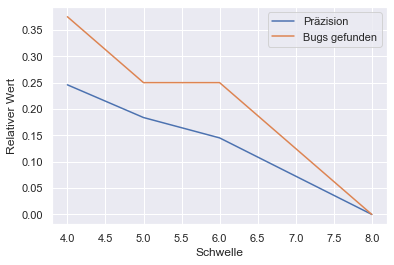

In [22]:
# plt.plot(thresholds, accuracys, label='accuracy')
plt.plot(thresholds, precisions, label='Präzision')
# plt.plot(thresholds, recalls, label='recall')
# plt.plot(thresholds, f1s, label='f1')
plt.plot(thresholds, all_bugs_found, label='Bugs gefunden')
plt.xlabel('Schwelle')
plt.ylabel('Relativer Wert')
plt.savefig(str(log_folder + f"threshold_analysis.png"), dpi=300, bbox_inches='tight')
plt.legend()
plt.show()

In [23]:
threshold = 4
true_positives, false_positives, tp, fp, tn, fn, bugs_found = eval_bugs(threshold)

instance 0
true_positive 42
false_positive 1



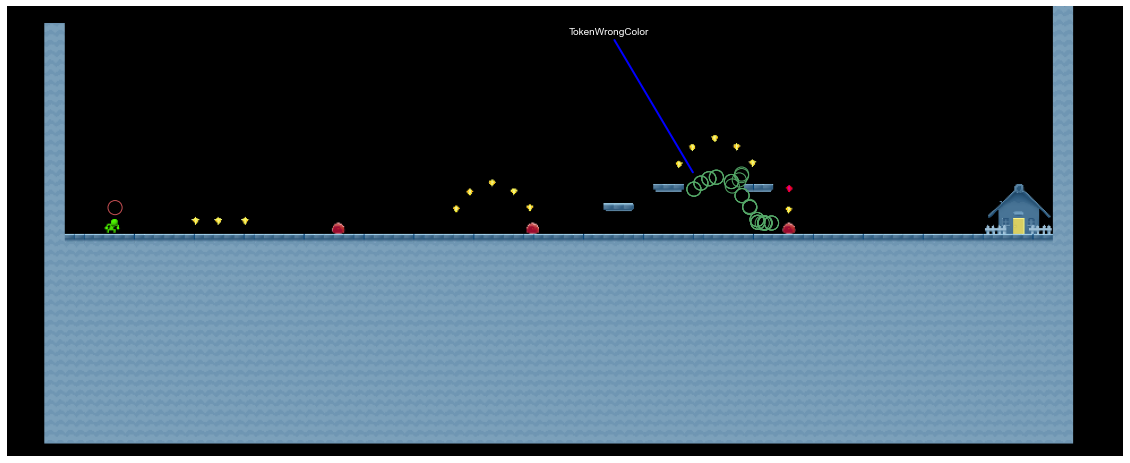

instance 1
true_positive 31
false_positive 153



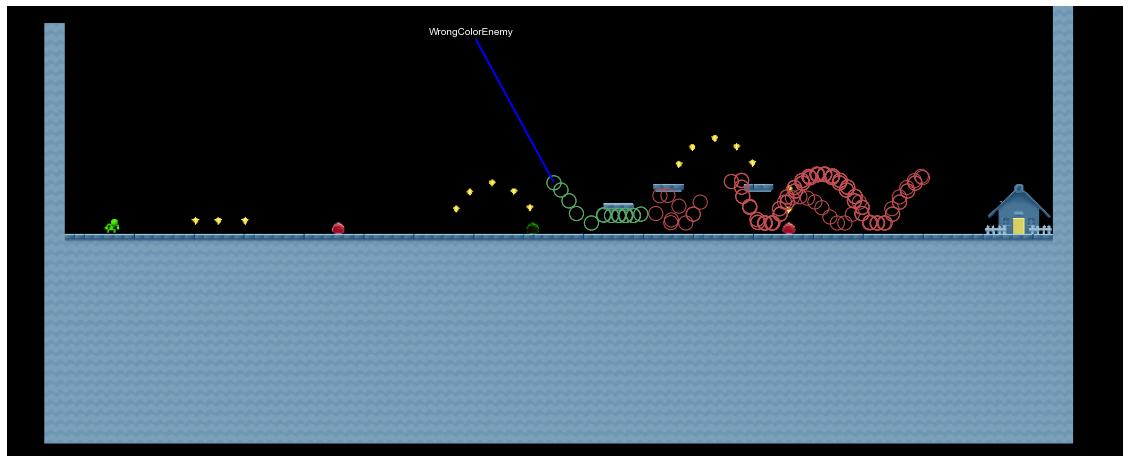

instance 2
true_positive 1
false_positive 35



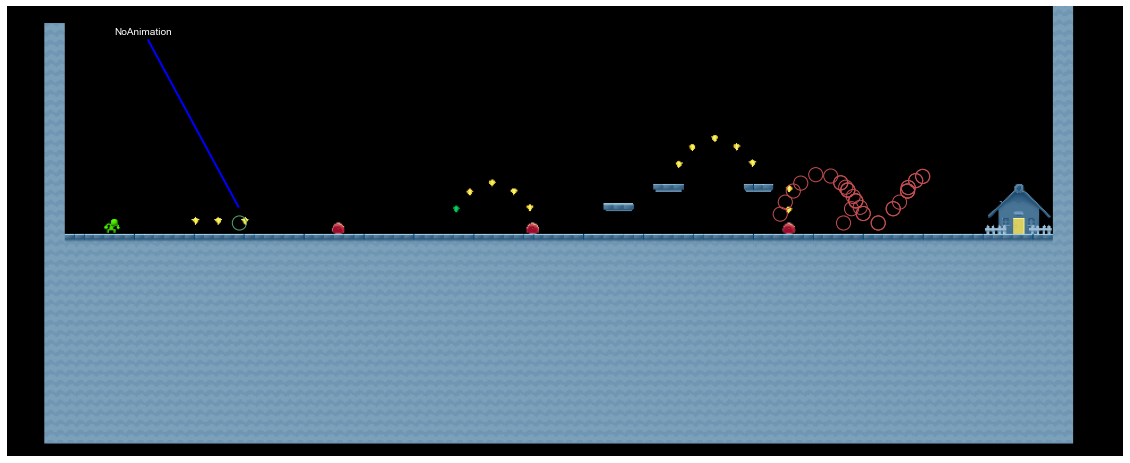

instance 3
true_positive 0
false_positive 38



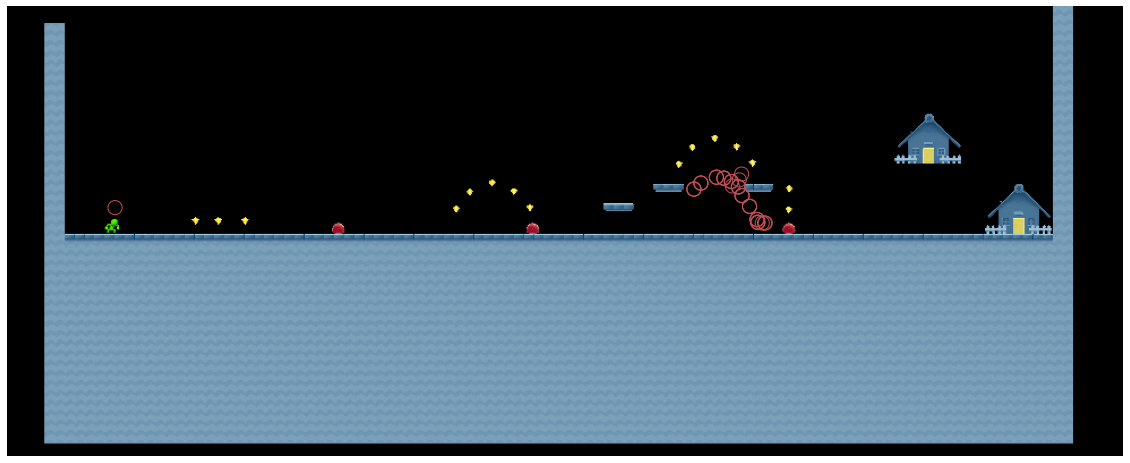

In [24]:
for j, (true_pos, false_pos) in enumerate(zip(true_positives, false_positives)):
    print(f"instance {j}")
    print('true_positive', len(true_pos))
    print('false_positive', len(false_pos))
    print()
    
    fig = plt.figure(figsize=(20, 10))
    x_false = np.array([row[0] for row in false_pos])
    y_false = np.array([row[1] for row in false_pos])
    plt.scatter(x_false, y_false, s=200, color='none', edgecolors='r', label="false positive")
    
    x = np.array([row['x'] for row in true_pos])
    y =  np.array([row['y'] for row in true_pos])
    names = np.array([row['name'] for row in true_pos])

    idx = np.argsort(x)
    x = x[idx]
    y = y[idx]
    names = names[idx]

    names_set = set()

    plt.scatter(x, y, s=200, color='none', edgecolors='g', label="true positive")
    k = 0

    df_tmp = pd.DataFrame(data={'x': x, 'y': y, 'names': names})
    df_tmp = df_tmp.groupby(['names']).agg({'x': 'min', 'y': 'max'})
    df_tmp = df_tmp.clip(0)
    if(len(df_tmp) > 0):
        annotate_bugs_plot(fig.axes[0], df_tmp.index.tolist(), df_tmp.x.tolist(), df_tmp.y.tolist())

    plot_level(imgs[j])
    disable_grid_and_axis()
    # plt.title(f"Bugs found in instance {j} with curiosity > {threshold}")
    plt.savefig(str(log_folder + f"bugs_found_{j}.png"), dpi=300, bbox_inches='tight')
    plt.show()

threshol 8
true positive 74
false positive 227
true negative 2498
false negative 1133
accuracy 0.6541200406917599
precision 0.24584717607973422
recall 0.061309030654515324



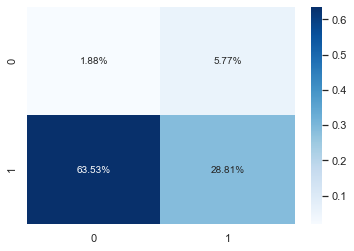

In [26]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
accuracy = (tp + tn) / (tp + fp + tn + fn)

print('threshol', t)
print('true positive', tp)
print('false positive', fp)
print('true negative', tn)
print('false negative', fn)
print('accuracy', accuracy)
print('precision', precision)
print('recall', recall)
print()

cf_matrix = np.array([
    [tp, fp], 
    [tn, fn]])
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=1, figsize=(25,30), clear=True)
plot_bugs_and_hight_curiosity(axs.flatten(), threshold)
plt.savefig(str(log_folder + f"best_curiosity_plot_all.png"), dpi=300, bbox_inches='tight')
plt.show()